<a href="https://colab.research.google.com/github/bmacedo6/Repository-F2/blob/main/sem_ai_crypto_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inspección de Data de Alta Frecuencia

Seminario: Inteligencia Artificial en las Finanzas

Profesores: A. Mendiola, PhD. y F. Rosales, PhD.

## Data Loading

In [ ]:
# Specialized libraries
!pip install schedule
!pip install krakenex

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import schedule
import krakenex
from google.colab import files

In [ ]:
# Authentication
def load_api_keys(filepath):
  with open(filepath, 'r') as file:
    lines = file.readlines()
    api_key = lines[0].strip().split('=')[1]
    api_secret = lines[1].strip().split('=')[1]
  return api_key, api_secret

In [ ]:
# Fetch OHLC data from Kraken
#def get_ohlc_data(pair = 'XXBTZUSD', interval = 1440, start = None):
def get_ohlc_data(pair = 'XXBTZUSD', interval = 1, start = None):
  params = {'pair': pair, 'interval': interval}
  if start is not None:
    start_timestamp = int(pd.Timestamp(start).timestamp())
    params['since'] = start_timestamp

    response = api.query_public('OHLC', params)
    data = response['result'][pair]
    df = pd.DataFrame(data, columns = ['time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count'])
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.set_index('time', inplace = True)
    df = df.astype(float)
  return df

## Inspección de la Data

In [ ]:
# Initialize Kraken API
api = krakenex.API()
api.key = '9reIi8M/WV7yivDAppBi5dCLc04YiSNvcAXXMQHxtyvaE1pIw/yTNco8'
api.secret = 'NO5JUe6BcbS7xghXDOIJ433300ViNnv2WTv6/mXKT0pPXAsvIzs6TNBtXJEJE0msK684zdrtZKnI0MBwXPndbA=='

In [ ]:
# Import data
df = get_ohlc_data(start = '2024-01-01')

In [ ]:
df.head(15)

,open,high,low,close,vwap,volume,count
time,,,,,,,
2024-08-22 14:44:00,60555.5,60593.0,60535.1,60535.1,60573.3,0.036143,15.0
2024-08-22 14:45:00,60524.0,60532.4,60524.0,60532.3,60525.2,0.049696,15.0
2024-08-22 14:46:00,60532.4,60539.8,60524.0,60524.0,60524.1,2.057308,15.0
2024-08-22 14:47:00,60519.1,60519.1,60470.0,60470.0,60495.9,0.057045,12.0
2024-08-22 14:48:00,60470.1,60470.1,60470.0,60470.0,60470.0,0.115551,8.0
2024-08-22 14:49:00,60470.0,60470.1,60339.0,60368.8,60380.4,9.091240,120.0
2024-08-22 14:50:00,60368.7,60456.6,60368.7,60447.5,60418.2,1.172686,40.0
2024-08-22 14:51:00,60449.3,60519.0,60449.3,60518.9,60516.6,2.244429,30.0
2024-08-22 14:52:00,60519.0,60524.0,60518.9,60519.0,60523.1,0.045334,8.0


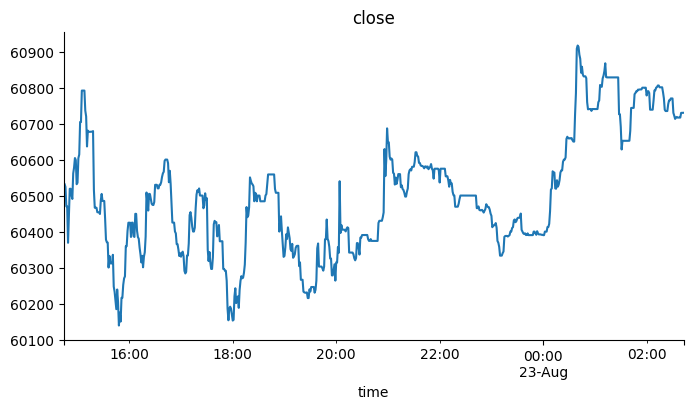

In [ ]:
# @title close

from matplotlib import pyplot as plt
df['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

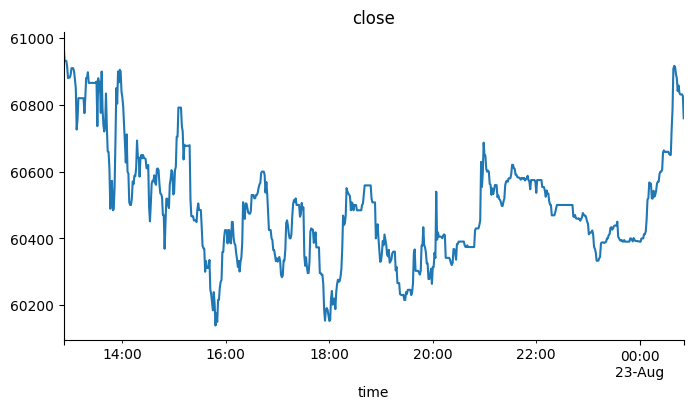

In [ ]:
# @title close

from matplotlib import pyplot as plt
df['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

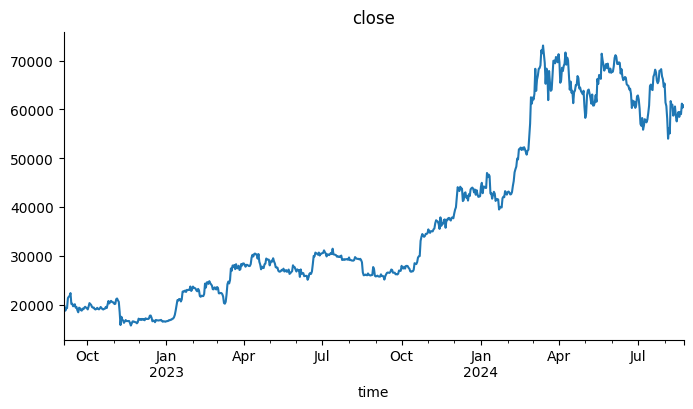

In [ ]:
# @title close

from matplotlib import pyplot as plt
df['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

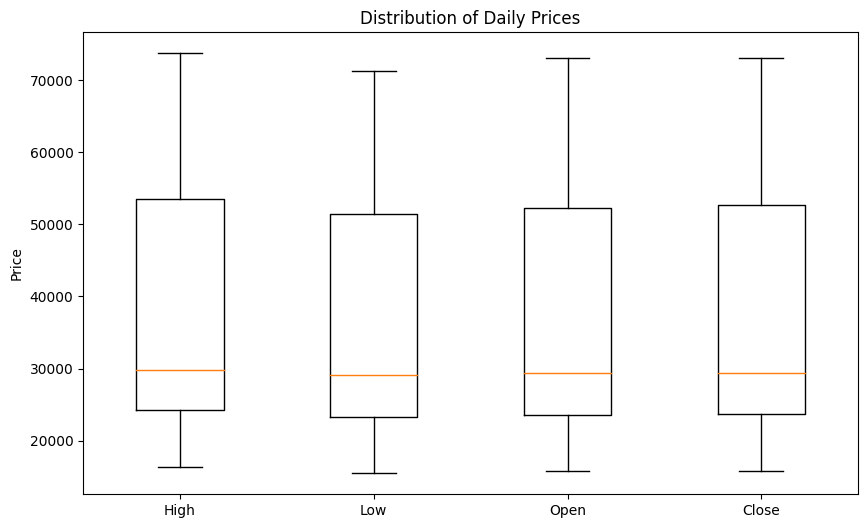

In [ ]:
# @title Distribution of Daily Prices

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([df['high'], df['low'], df['open'], df['close']], labels=['High', 'Low', 'Open', 'Close'])
plt.ylabel('Price')
_ = plt.title('Distribution of Daily Prices')

(720, 7)